# In questa lezione intraprenderemo i Missing Values, tradotto dall'Inglese in "Valori Mancanti", e di come gestirli.

Librerie usate :
#### - Pandas ( pd ) > [importare, manipolare e analizzare dati, consente di eseguire operazioni come la selezione, il filtraggio, il raggruppamento e il calcolo di statistiche basati su Dataframe, cioè "tabelle".];
-
#### - NumPy ( np ) > [consente di gestire grandi quantità di dati ed offre anche un'ampia gamma di funzioni matematiche e di algebra lineare per manipolare e analizzare questi dati in modo efficiente.];
-
#### - Matplotlib.pyplot ( plt ) > [creare grafici e visualizzare dei dati in modo semplice. E' possibile generare diversi tipi di grafici, come a linee, istogrammi e scatter plot. Si può personalizzare l'aspetto dei grafici, aggiungere titoli, etichette degli assi e colori.];
-
#### - Seaborn ( sns ) > [estensione di Matplotlib.pyplot che aggiunge qualche grafico e personalizzazione alla libreria];
-
#### - Plotly.express ( px ) > [creare grafici, come Matplotlib.pyplot e la sua estensione Seaborn, e visualizzarli i dati in modo interrattivo];

In [238]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import plotly.express as px

Iniziamo

### Variabili : Età, Punteggio, Ammesso

In [185]:
# Dataset con dati mancanti rappresentati da None o NaN
dataset = [
    {"età": 25, "punteggio": 90, "ammesso": 1},  # Prima riga: età = 25, punteggio = 90, ammesso = 1
    {"età": None, "punteggio": 85, "ammesso": 0},  # Seconda riga: età mancante, punteggio = 85, ammesso = 0
    {"età": 28, "punteggio": None, "ammesso": 1},  # Terza riga: età = 28, punteggio mancante, ammesso = 1
    {"età": None, "punteggio": 75, "ammesso": 1},  # Quarta riga: età mancante, punteggio = 75, ammesso = 1
    {"età": 23, "punteggio": None, "ammesso": None},  # Quinta riga: età = 23, punteggio mancante, ammesso mancante
    {"età": 23, "punteggio": 77, "ammesso": None},  # Sesta riga: età = 23, punteggio = 77, ammesso mancante
]

df = pd.DataFrame(dataset) #dataframe è una tabella
df

#creazione di una lista (dataset) e dizionario

,età,punteggio,ammesso
0,25.0,90.0,1.0
1,NaN,85.0,0.0
2,28.0,NaN,1.0
3,NaN,75.0,1.0
4,23.0,NaN,NaN
5,23.0,77.0,NaN


In [124]:
df['punteggio']

0    90.0
1    85.0
2     NaN
3    75.0
4     NaN
5    77.0
Name: punteggio, dtype: float64

In [125]:
#identificazione delle righe con dati mancanti
righe_con_dati_mancanti = df[df.isnull().any(axis=1)]
righe_con_dati_mancanti

# df[df.isnull().any(axis=1) =  controlla se nel dataset(df) ci sono valori mancanti e 
                                #restituisce un True o False come valore (isnull) controllando ogni riga per questo valore


,età,punteggio,ammesso
1,NaN,85.0,0.0
2,28.0,NaN,1.0
3,NaN,75.0,1.0
4,23.0,NaN,NaN
5,23.0,77.0,NaN


In [126]:
#identificazione delle righe con dati mancanti
righe_con_dati_mancanti = df[df.isnull().any(axis=1)]
len(righe_con_dati_mancanti)

# len(righe_con_dati_mancanti) =  mostra quante righe che contengono dati mancanti nel Dataframe

5

In [130]:
missing_percent = (df.isnull().sum() / len(df)) * 100 
#sum conta per colonna i dati mancanti, isnull() dice TRUE per i dati mancanti
missing_percent

# calcola la percentuale dei valori mancanti per ciasciuna colonna
# missing_percent = (df.isnull().sum() / len(df)) * 100 =  df.isnull().sum() somma i valori mancanti
                                                            # len(df) da quante righe sono presenti

età          33.333333
punteggio    33.333333
ammesso      33.333333
dtype: float64

In [131]:
#Conta quante righe con dati mancanti ci sono in totale
totale_dati_mancanti = righe_con_dati_mancanti.shape[0] #0=righe, 1=colonne
totale_dati_mancanti

5

In [132]:
print('righe con dati mancanti:')
print(righe_con_dati_mancanti)
print('Totale dati mancanti: ',totale_dati_mancanti)

righe con dati mancanti:
    età  punteggio  ammesso
1   NaN       85.0      0.0
2  28.0        NaN      1.0
3   NaN       75.0      1.0
4  23.0        NaN      NaN
5  23.0       77.0      NaN
Totale dati mancanti:  5


## Variabili : Nome, Punteggio, Email

In [133]:
import pandas as pd

# Dataset con dati mancanti rappresentati da None o NaN
dataset = [
    {"nome": "Alice", "età": 25, "punteggio": 90, "email": "alice@email.com"},
    {"nome": "Bob", "età": 22, "punteggio": None, "email": None},
    {"nome": "Charlie", "età": 28, "punteggio": 75, "email": "charlie@email.com"},
]

# Converti il dataset in un DataFrame
df = pd.DataFrame(dataset)
df

,nome,età,punteggio,email
0,Alice,25,90.0,alice@email.com
1,Bob,22,NaN,None
2,Charlie,28,75.0,charlie@email.com


In [134]:
#Rimuovi le righe con dati mancanti
df1=df.dropna(inplace=False) #crea un nuovo dataframe in questo caso senza riga
                             #se è true allora sostituisce il nuovo dataframe in generale con quello nuovo
df1

#inplace=False significa che non modificail dataframe originale ma, infatti, ne crea uno diverso

,nome,età,punteggio,email
0,Alice,25,90.0,alice@email.com
2,Charlie,28,75.0,charlie@email.com


## Variabili : Var1, Var2

In [223]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Genera dati di esempio
data = {
    'Variable1': [1, 2, 3, 4, 5],
    'Variable2': [1, 2, np.nan, 4, np.nan],
    'Missing_Column': ['A', 'B', 'A', 'C', np.nan]
}
# Crea un DataFrame
df = pd.DataFrame(data)
df1=pd.DataFrame()
df

,Variable1,Variable2,Missing_Column
0,1,1.0,A
1,2,2.0,B
2,3,NaN,A
3,4,4.0,C
4,5,NaN,NaN


# Codici filtrati per Variabili e Grafici

Da qui in poi ci saranno i Codici che si collegano ai loro grafici, ma anche codici che useranno le variabili specificate

# ↓  -  ↓  -  ↓  -  ↓  -  ↓  -  ↓  -  ↓  -  ↓  -  ↓  -  ↓  -  ↓  -  ↓  -  ↓  -  ↓  -  ↓  -  ↓  

## Variabili : Età, Genere, Punteggio, Reddito

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Imposta il seed per generare numeri casuali, 
# ogni volta che si avvierà con il seed 42, i numeri non cambieranno
np.random.seed(42)
data = {
    'Età': np.random.randint(18, 70, size=1000),  # Genera 1000 età casuali comprese tra 18 e 70
    'Genere': np.random.choice(['Maschio', 'Femmina'], size=1000),# Genera 1000 valori casuali per il genere
    'Punteggio': np.random.uniform(0, 100, size=1000),# Genera 1000 punteggi casuali da una distribuzione uniforme tra 0 e 100
    'Reddito': np.random.normal(50000, 15000, size=1000)# Genera 1000 redditi casuali da una distribuzione gaussiana/normale con media 50000 e deviazione 15000
}

df = pd.DataFrame(data)

# Visualizza le prime righe del dataset
print(df.head())

   Età   Genere  Punteggio       Reddito
0   56  Maschio  85.120691  52915.764524
1   69  Maschio  49.514653  44702.505608
2   46  Maschio  48.058658  55077.257652
3   32  Femmina  59.240778  45568.978848
4   60  Maschio  82.468097  52526.914644


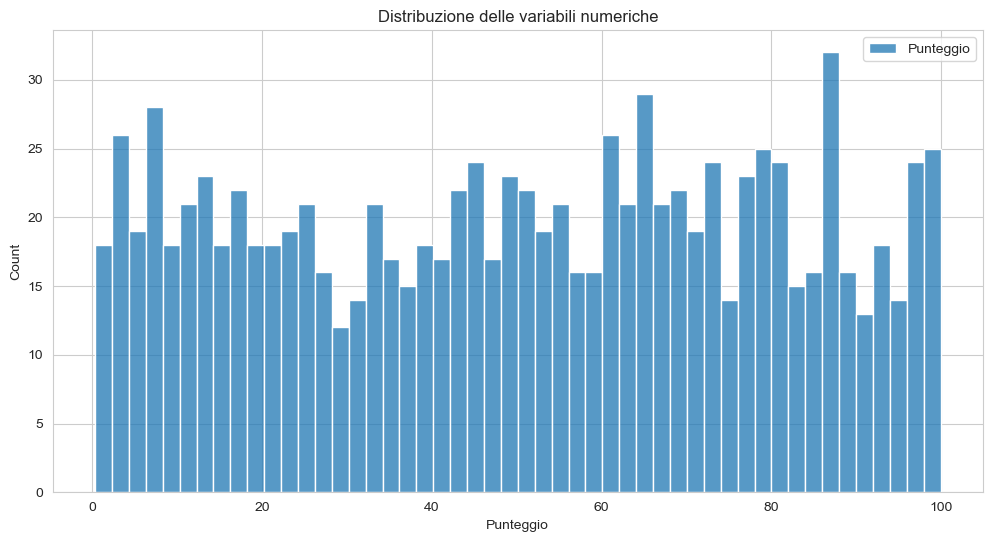

In [243]:
# Visualizza la distribuzione delle variabili numeriche

plt.figure(figsize=(12, 6)) # Imposta le dimensioni della figura del grafico

# Imposta lo stile del grafico a whitegrid per una griglia di sfondo bianco
sns.set_style('whitegrid')

# Crea un istogramma della colonna 'Punteggio' del DataFrame df
sns.histplot(df['Punteggio'], kde=False, bins=50, label='Punteggio')  # Histplot crea un istogramma senza la KDE, cioè la media
                                                                        # bins=50, quante barre
plt.legend()
plt.title('Distribuzione delle variabili numeriche')
plt.show()

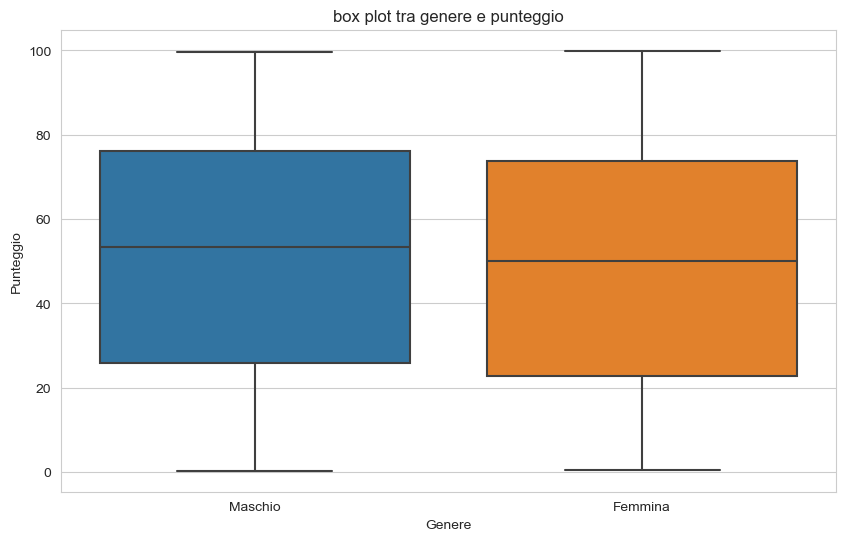

In [204]:
# Visualizza una box plot per una variabile numerica rispetto a un'altra

plt.figure(figsize=(10, 6))  # Imposta le dimensioni della figura del grafico

# Crea una box plot che mostra la distribuzione dei punteggi in base al genere
sns.boxplot(x='Genere', y='Punteggio', data=df)  # Boxplot del punteggio rispetto al genere
plt.title('Box plot tra Genere e Punteggio')
plt.show()

In [163]:
#visualizza un grafico a dispersione interattivo utilizzando platly
fig = px.scatter(df, x='Età', y='Reddito', color='Genere', size='Punteggio')
fig.update_layout(title='Grafico a dispersione interattivo')
fig.show()

## Variabili : Data, Vendite, Prodotto

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Genera dati casuali per l'esplorazione
np.random.seed(42) # Imposta il seed per generare numeri casuali, 
# ogni volta che si avvierà con il seed 42, i numeri non cambieranno

data = {
    'Data': pd.date_range(start='2023-01-01', end='2023-12-31', freq='D'),  # Genera date casuali dal 1° gennaio 2023 al 31 dicembre 2023 con frequenza giornaliera
    'Vendite': np.random.randint(100, 1000, size=365),  # Genera 365 numeri casuali interi compresi tra 100 e 1000 per rappresentare le vendite giornaliere
    'Prodotto': np.random.choice(['A', 'B', 'C'], size=365)  # Genera 365 scelte casuali tra le opzioni 'A', 'B' e 'C' per rappresentare il prodotto venduto in ciascun giorno
}

df = pd.DataFrame(data) 

print(df.head())  # Stampa le prime 5 righe del DataFrame per esaminare i dati generati

        Data  Vendite Prodotto
0 2023-01-01      202        B
1 2023-01-02      535        A
2 2023-01-03      960        C
3 2023-01-04      370        A
4 2023-01-05      206        A


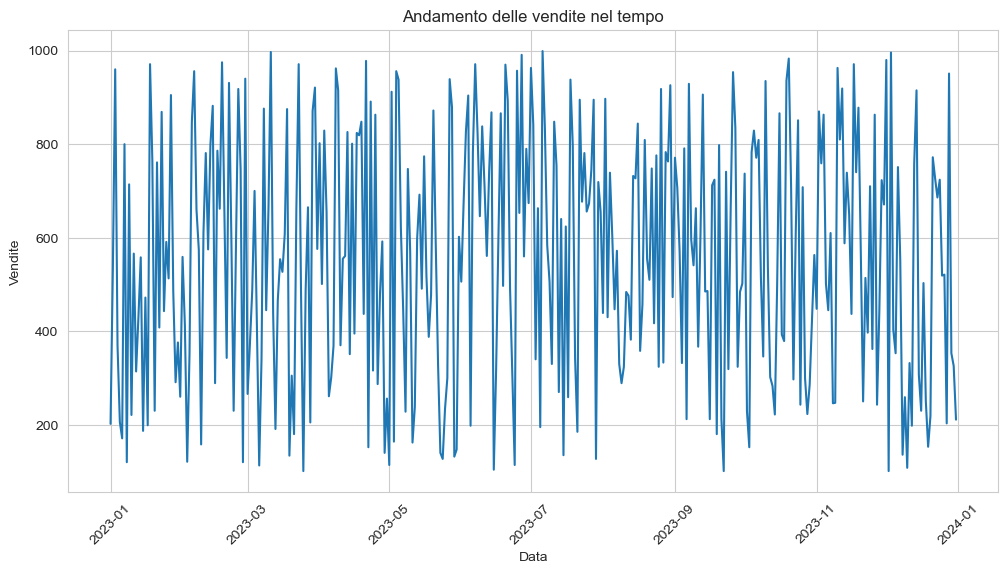

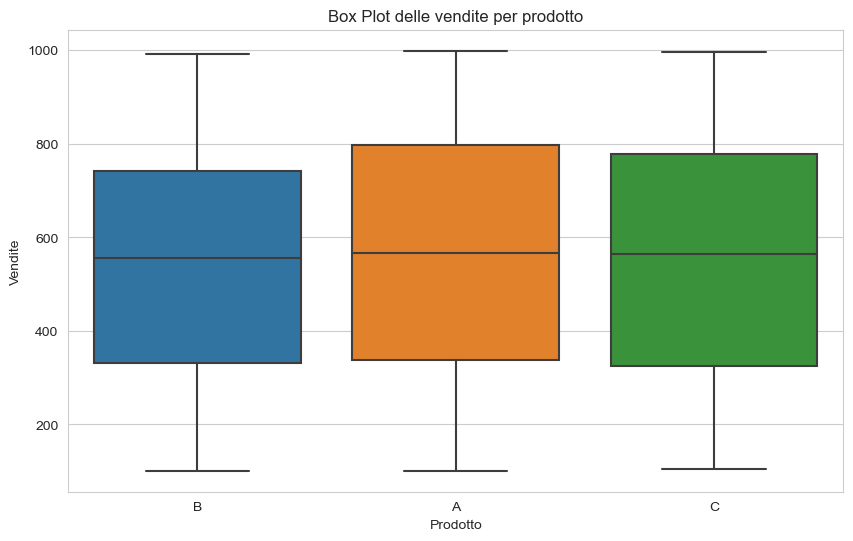

In [121]:
# Visualizza un grafico delle vendite nel tempo
plt.figure(figsize=(12, 6))  # Imposta le dimensioni della figura del grafico
sns.lineplot(x='Data', y='Vendite', data=df)  # Crea un grafico a linee delle vendite nel tempo
plt.title('Andamento delle vendite nel tempo')
plt.xlabel('Data')
plt.ylabel('Vendite')
plt.xticks(rotation=45)  # Ruota le etichette sull'asse x di 45 gradi
plt.show()

# Visualizza una box plot delle vendite per prodotto
plt.figure(figsize=(10, 6))  # Imposta le dimensioni della figura del grafico
sns.boxplot(x='Prodotto', y='Vendite', data=df)  # Crea un box plot delle vendite per prodotto
plt.title('Box Plot delle vendite per prodotto') 
plt.xlabel('Prodotto')
plt.ylabel('Vendite')
plt.show() 

## Variabili : Età, Soddisfazione, NumVar, CatVar

In [199]:
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

# Genera dati di esempio
data = {
    'Numeric_Var': [1, 2, 3, 4, np.nan, 6],  # Lista di valori numerici con un valore mancante rappresentato come np.nan
    'Categorical_Var': ['A', 'B', 'A', 'B', 'A', 'B']  # Lista di valori categorici
}

# Crea un DataFrame utilizzando i dati di esempio
df = pd.DataFrame(data)

# Stampa il DataFrame
print(df)

   Numeric_Var Categorical_Var
0          1.0               A
1          2.0               B
2          3.0               A
3          4.0               B
4          NaN               A
5          6.0               B


   Numeric_Var Categorical_Var
0          1.0               A
1          2.0               B
2          3.0               A
3          4.0               B
4          2.0               A
5          6.0               B


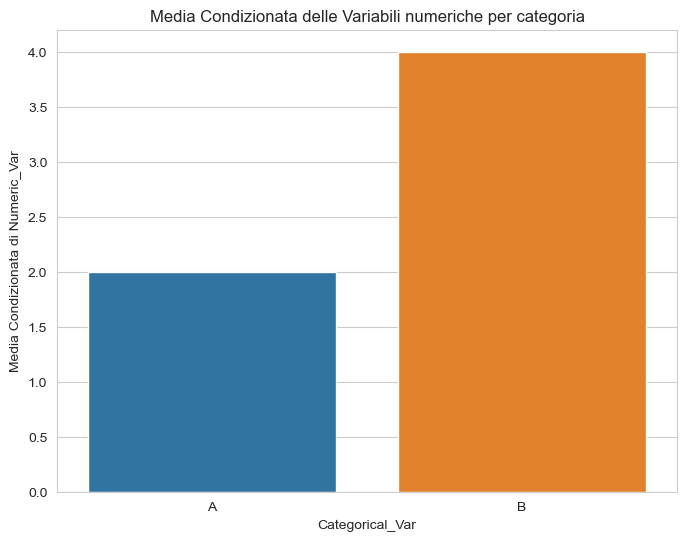

In [103]:
# Calcola la media condizionata
conditional_means = df['Numeric_Var'].fillna(  # Seleziona la colonna 'Numeric_Var' dal DataFrame
    df.groupby('Categorical_Var')['Numeric_Var']  # Raggruppa i dati della colonna 'Numeric_Var' per ogni valore unico della colonna 'Categorical_Var'
    .transform('mean')  # Calcola la media dei valori di 'Numeric_Var' per ogni gruppo definito da 'Categorical_Var'
)


# Aggiorna la colonna 'Numeric_Var' con la media condizionata
df['Numeric_Var'] = conditional_means

# Stampa il DataFrame aggiornato
print(df)

# Crea un grafico a barre per mostrare la media condizionata per ogni categoria
plt.figure(figsize=(8, 6))  # Imposta le dimensioni della figura del grafico
sns.barplot(data=df, x='Categorical_Var', y='Numeric_Var', ci=None)  # Crea un grafico a barre utilizzando Seaborn
plt.xlabel('Categorical_Var')
plt.ylabel('Media Condizionata di Numeric_Var')
plt.title('Media Condizionata delle Variabili numeriche per categoria') 
plt.show()  # Mostra il grafico


     Età        Soddisfazione
0     56    Molto Soddisfatto
1     46  Molto Insoddisfatto
2     32               Neutro
3     60               Neutro
4     25  Molto Insoddisfatto
..   ...                  ...
495   37    Molto Soddisfatto
496   41    Molto Soddisfatto
497   29    Molto Soddisfatto
498   52    Molto Soddisfatto
499   50    Molto Soddisfatto

[500 rows x 2 columns]
     Età        Soddisfazione  Numeric_Var
0     56    Molto Soddisfatto    41.651376
1     46  Molto Insoddisfatto    40.054054
2     32               Neutro    41.747368
3     60               Neutro    41.747368
4     25  Molto Insoddisfatto    40.054054
..   ...                  ...          ...
495   37    Molto Soddisfatto    41.651376
496   41    Molto Soddisfatto    41.651376
497   29    Molto Soddisfatto    41.651376
498   52    Molto Soddisfatto    41.651376
499   50    Molto Soddisfatto    41.651376

[500 rows x 3 columns]


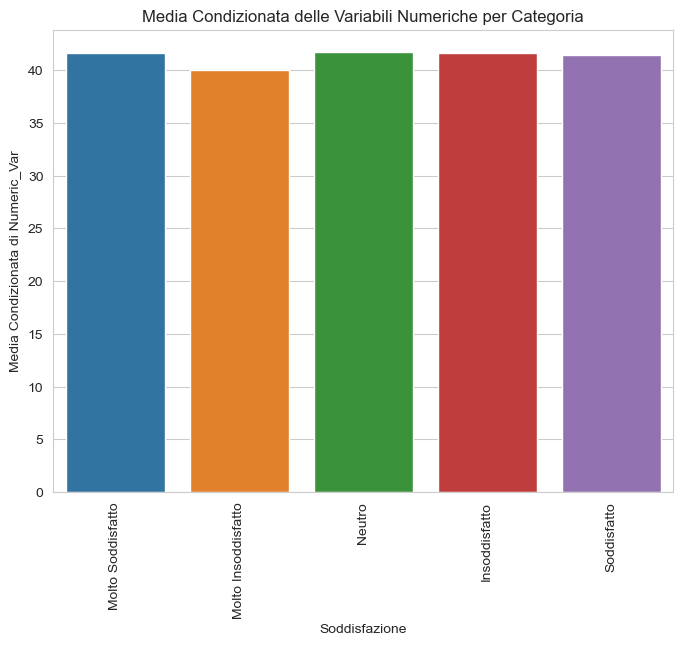

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Genera dati casuali per l'esplorazione
np.random.seed(42) # Imposta il seed per generare numeri casuali, 
# ogni volta che si avvierà con il seed 42, i numeri non cambieranno

data = {
    'Età': np.random.randint(18, 65, size=500),  # Genera 500 età casuali comprese tra 18 e 64
    'Soddisfazione': np.random.choice(['Molto Soddisfatto', 'Soddisfatto', 'Neutro', 'Insoddisfatto', 'Molto Insoddisfatto'], size=500)  
    # Genera 500 scelte casuali di soddisfazione tra le opzioni disponibili
}

df = pd.DataFrame(data)
print(df)

conditional_means = df.groupby('Soddisfazione')['Età'].transform('mean')
# Calcola la media delle età per ogni categoria di soddisfazione e applica questo valore a ogni riga del DataFrame originale

# Aggiungi una nuova colonna 'Numeric_Var' al DataFrame contenente la media condizionata
df['Numeric_Var'] = conditional_means
print(df)

# Crea un grafico a barre per mostrare la media condizionata per ogni categoria di soddisfazione
plt.figure(figsize=(8, 6))  # Imposta le dimensioni della figura del grafico
sns.barplot(data=df, x='Soddisfazione', y='Numeric_Var', errorbar=None)  # Crea un grafico a barre utilizzando Seaborn
plt.xlabel('Soddisfazione')
plt.ylabel('Media Condizionata di Numeric_Var')
plt.title('Media Condizionata delle Variabili Numeriche per Categoria')
plt.xticks(rotation=90)  # Ruota le etichette sull'asse x di 90 gradi
plt.show()


   Età        Soddisfazione  Numeric_Var
0   56    Molto Soddisfatto    41.651376
1   46  Molto Insoddisfatto    40.054054
2   32               Neutro    41.747368
3   60               Neutro    41.747368
4   25  Molto Insoddisfatto    40.054054


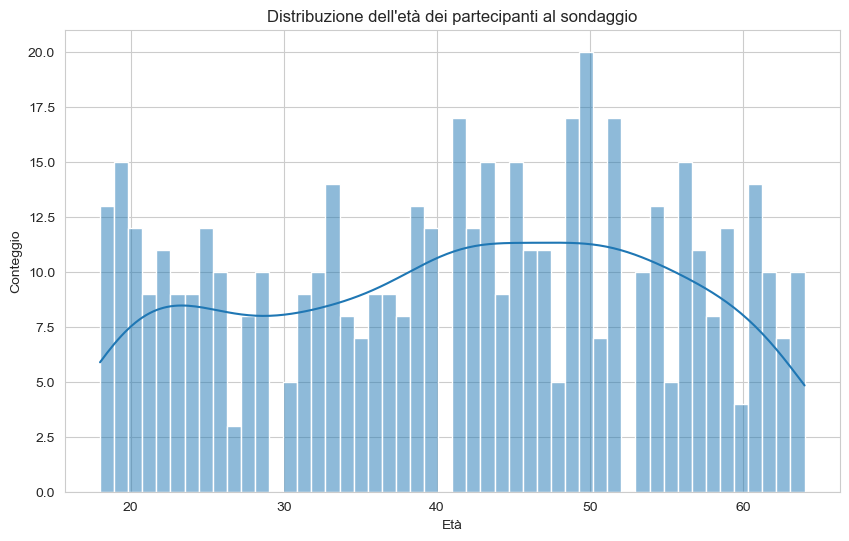

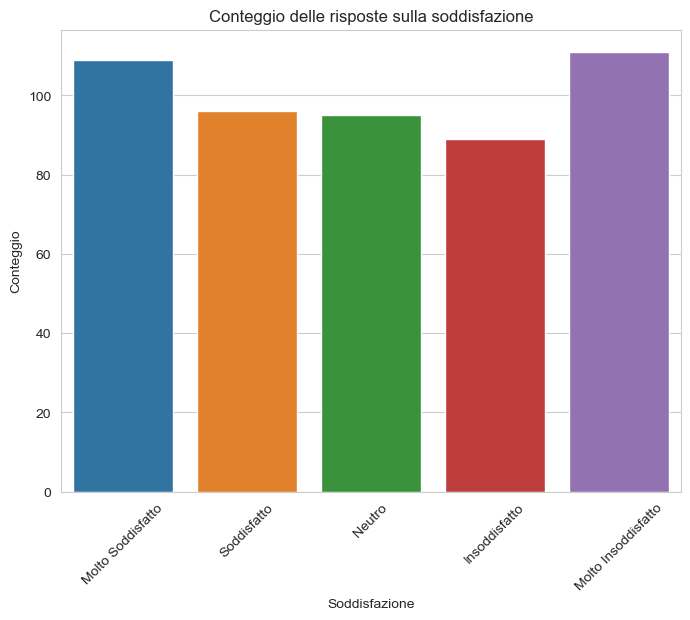

In [169]:
# Visualizza le prime righe del dataset
print(df.head())

# Visualizza una distribuzione dell'età
plt.figure(figsize=(10, 6))  # Imposta le dimensioni della figura del grafico
sns.histplot(df['Età'], bins=50, kde=True)  # Crea un istogramma della distribuzione delle età utilizzando Seaborn
plt.title('Distribuzione dell\'età dei partecipanti al sondaggio')
plt.xlabel('Età') 
plt.ylabel('Conteggio') 
plt.show()

# Visualizza un conteggio delle risposte sulla soddisfazione
plt.figure(figsize=(8, 6))  # Imposta le dimensioni della figura del grafico

sns.countplot(x='Soddisfazione', data=df, order=['Molto Soddisfatto', 'Soddisfatto', 'Neutro', 'Insoddisfatto', 'Molto Insoddisfatto'])  
# Crea un grafico a barre del conteggio delle risposte sulla soddisfazione utilizzando Seaborn

plt.title('Conteggio delle risposte sulla soddisfazione') 
plt.xlabel('Soddisfazione')
plt.ylabel('Conteggio')
plt.xticks(rotation=45)  # Ruota le etichette sull'asse x di 45 gradi
plt.show()


## Variabili : NumCol e CatCol

In [225]:
import pandas as pd  
import numpy as np

# Impostare il seed per rendere i risultati riproducibili
np.random.seed(41)

# Creare un dataframe vuoto
df = pd.DataFrame()

# Generare dati casuali
n_rows = 10000  # Numero di righe del DataFrame
df['CatCol1'] = np.random.choice(['A', 'B', 'C'], size=n_rows)# Aggiunge una colonna con valori casuali tra 'A', 'B', 'C'
df['CatCol2'] = np.random.choice(['X', 'Y'], size=n_rows)# Aggiunge una colonna con valori casuali tra 'X', 'Y'
df['NumCol1'] = np.random.randn(n_rows)# Aggiunge una colonna con valori casuali distribuiti secondo una distribuzione normale
df['NumCol2'] = np.random.randint(1, 100, size=n_rows)# Aggiunge una colonna con valori interi casuali tra 1 e 100
df['NumCol3'] = np.random.uniform(0, 1, size=n_rows)# Aggiunge una colonna con valori casuali distribuiti uniformemente tra 0 e 1

# Calcolare il numero totale di missing values desiderati
total_missing_values = int(0.03 * n_rows * len(df.columns))  
# Calcola il numero totale di valori mancanti desiderati come il 3% del numero di righe moltiplicato per il numero di colonne

# Introdurre missing values casuali
for column in df.columns: 
    num_missing_values = np.random.randint(0, total_missing_values + 1)  # Numero casuale di valori mancanti per la colonna attuale
    missing_indices = np.random.choice(n_rows, size=num_missing_values, replace=False)# Indici casuali delle righe in cui inserire valori mancanti
    df.loc[missing_indices, column] = np.nan  # Assegna NaN ai valori mancanti nelle posizioni casuali

df

,CatCol1,CatCol2,NumCol1,NumCol2,NumCol3
0,A,NaN,0.440877,49.0,0.246007
1,A,Y,1.945879,28.0,0.936825
2,C,X,0.988834,42.0,0.751516
3,A,Y,-0.181978,73.0,0.950696
4,B,X,2.080615,74.0,0.903045
...,...,...,...,...,...
9995,C,Y,1.352114,61.0,0.728445
9996,C,Y,1.143642,67.0,0.605930
9997,A,X,-0.665794,54.0,0.071041
9998,C,Y,0.004278,NaN,NaN


In [221]:
#identificazione delle righe con dati mancati
righe_con_dati_mancanti = df[df.isnull().any(axis=1)]
len(righe_con_dati_mancanti)

3648

In [222]:
missing_percent = (df.isnull().sum() / len(df) * 100)
missing_percent

CatCol1     0.29
CatCol2    10.63
NumCol1     9.67
NumCol2    10.48
NumCol3    12.69
dtype: float64

In [174]:
#elimina le righe in cui entrambe le features categoriche hanno valori NaN
df = df.dropna(subset=['CatCol1', 'CatCol2'], how='all')
df

,CatCol1,CatCol2,NumCol1,NumCol2,NumCol3
0,A,NaN,0.440877,49.0,0.246007
1,A,Y,1.945879,28.0,0.936825
2,C,X,0.988834,42.0,0.751516
3,A,Y,-0.181978,73.0,0.950696
4,B,X,2.080615,74.0,0.903045
...,...,...,...,...,...
9995,C,Y,1.352114,61.0,0.728445
9996,C,Y,1.143642,67.0,0.605930
9997,A,X,-0.665794,54.0,0.071041
9998,C,Y,0.004278,NaN,NaN


In [175]:
#elimina le righe in cui entrambe le features categoriche hanno valori NaN
df = df.dropna(subset=['NumCol1', 'NumCol2', 'NumCol3'], how='all')
df

,CatCol1,CatCol2,NumCol1,NumCol2,NumCol3
0,A,NaN,0.440877,49.0,0.246007
1,A,Y,1.945879,28.0,0.936825
2,C,X,0.988834,42.0,0.751516
3,A,Y,-0.181978,73.0,0.950696
4,B,X,2.080615,74.0,0.903045
...,...,...,...,...,...
9995,C,Y,1.352114,61.0,0.728445
9996,C,Y,1.143642,67.0,0.605930
9997,A,X,-0.665794,54.0,0.071041
9998,C,Y,0.004278,NaN,NaN


In [227]:
df1[numeric_cols.columns] = df[numeric_cols.columns].fillna(df[numeric_cols.columns].mean())
df1

#crea colonne con stessi nomi (var1 e var2) = assegna valori delle colonne df originale(mean=media)

,NumCol1,NumCol2,NumCol3
0,0.440877,49.000000,0.246007
1,1.945879,28.000000,0.936825
2,0.988834,42.000000,0.751516
3,-0.181978,73.000000,0.950696
4,2.080615,74.000000,0.903045
...,...,...,...
9995,1.352114,61.000000,0.728445
9996,1.143642,67.000000,0.605930
9997,-0.665794,54.000000,0.071041
9998,0.004278,50.232574,0.502210


In [176]:
# Seleziona le numeric_cols nel DataFrame, includendo la variabile number
numeric_cols = df.select_dtypes(include=['number'])

# Seleziona le categorical_cols e nel DataFrame, escludendo la variabile number
categorical_cols = df.select_dtypes(exclude=['number'])

# Sostituisci i valori mancanti nelle colonne categoriche con la moda utilizzando .loc
# Viene utilizzato il metodo .mode() per trovare la moda di ciascuna categorical_cols e 
# poi i valori mancanti vengono sostituiti con la moda corrispondente. (la massima frequenza distribuzione dati)
df.loc[:, categorical_cols.columns] = df[categorical_cols.columns].fillna(df[categorical_cols.columns].mode().iloc[0])

# Calcola la media condizionata solo per le colonne numeriche con dati mancanti
# I valori mancanti nelle colonne numeriche vengono riempiti con la media di ogni 
# gruppo di valori raggruppati per la colonna 'CatCol1'.
conditional_means = df[numeric_cols.columns].fillna(df.groupby('CatCol1')[numeric_cols.columns].transform('mean'))

# Aggiorna le colonne numeriche con la media condizionata utilizzando .loc
# Le colonne numeriche vengono aggiornate con i valori della media condizionata.
df.loc[:, numeric_cols.columns] = conditional_means

print(df)

     CatCol1 CatCol2   NumCol1    NumCol2   NumCol3
0          A       Y  0.440877  49.000000  0.246007
1          A       Y  1.945879  28.000000  0.936825
2          C       X  0.988834  42.000000  0.751516
3          A       Y -0.181978  73.000000  0.950696
4          B       X  2.080615  74.000000  0.903045
...      ...     ...       ...        ...       ...
9995       C       Y  1.352114  61.000000  0.728445
9996       C       Y  1.143642  67.000000  0.605930
9997       A       X -0.665794  54.000000  0.071041
9998       C       Y  0.004278  49.845018  0.489352
9999       A       X  0.622473  95.000000  0.751384

[9975 rows x 5 columns]


C:\Users\Utente\AppData\Local\Temp\ipykernel_7540\4240767683.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Utente\AppData\Local\Temp\ipykernel_7540\4240767683.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
#trattamento dei missing values nelle variabili numeriche
numeric_cols = df.select_dtypes(include=['number'])
numeric_cols

,NumCol1,NumCol2,NumCol3
0,0.440877,49.000000,0.246007
1,1.945879,28.000000,0.936825
2,0.988834,42.000000,0.751516
3,-0.181978,73.000000,0.950696
4,2.080615,74.000000,0.903045
...,...,...,...
9995,1.352114,61.000000,0.728445
9996,1.143642,67.000000,0.605930
9997,-0.665794,54.000000,0.071041
9998,0.004278,49.845018,0.489352


In [178]:
#trattamento dei missing values nelle variabili categoriche
categorical_cols = df.select_dtypes(exclude=['number']) #esclude colonne numeriche e fa vedere solo categoriche
categorical_cols.columns

Index(['CatCol1', 'CatCol2'], dtype='object')

In [198]:
#trattamento dei missing values nelle variabili numeriche
numeric_cols = df.select_dtypes(include=['number']) #include colonne numeriche e fa vedere solo categoriche
numeric_cols.columns

Index(['NumCol1', 'NumCol2', 'NumCol3'], dtype='object')

In [179]:
df1[numeric_cols.columns] = df[numeric_cols.columns].fillna(df[numeric_cols.columns].mean().iloc[1])
df1
#iloc[] = gestisce indici

,Variable1,Variable2,NumCol1,NumCol2,NumCol3
0,1,1.000000,0.440877,49.0,0.246007
1,2,2.000000,1.945879,28.0,0.936825
2,3,2.333333,0.988834,42.0,0.751516
3,4,4.000000,-0.181978,73.0,0.950696
4,5,2.333333,2.080615,74.0,0.903045


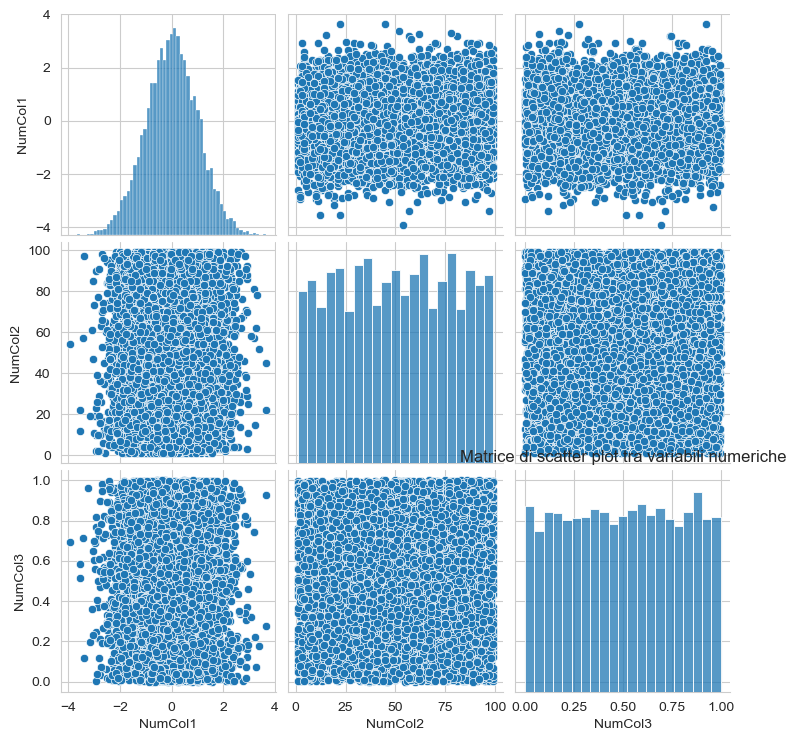

In [84]:
#visualizza la distribuzione delle variaibili numeriche
numeric_features = df.select_dtypes(include=[np.number])
#visualizza unam atrice di scatter plot tra le variabili numeriche
sns.pairplot(df[numeric_features.columns])
plt.title('Matrice di scatter plot tra variabili numeriche')
plt.show()

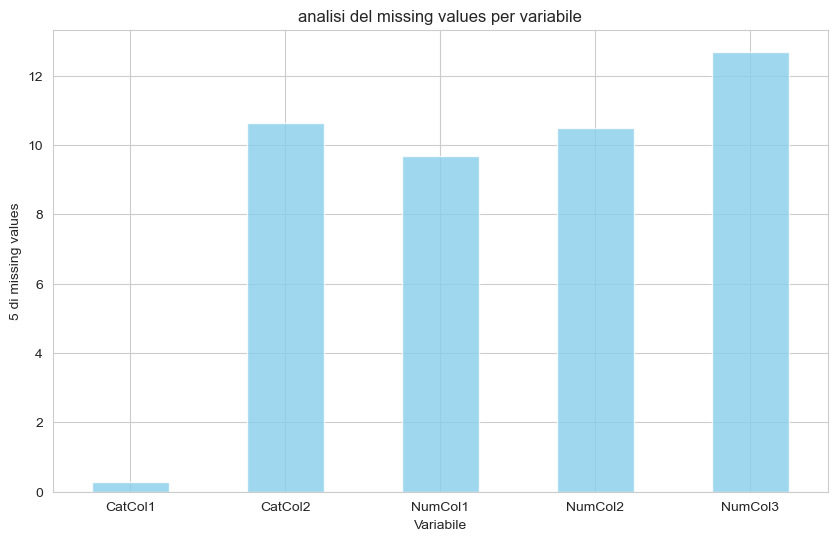

In [189]:
# Calcola la percentuale di righe con missing values per ciascuna variabile
missing_percent= (df.isnull().sum()) / len(df) * 100

#crea il grafico a barre
plt.figure(figsize=(10,6))
missing_percent.plot(kind='bar', color='skyblue', alpha=0.8)
plt.xlabel('Variabile')
plt.ylabel('5 di missing values')
plt.title('analisi del missing values per variabile')
plt.xticks(rotation=0)
plt.show()

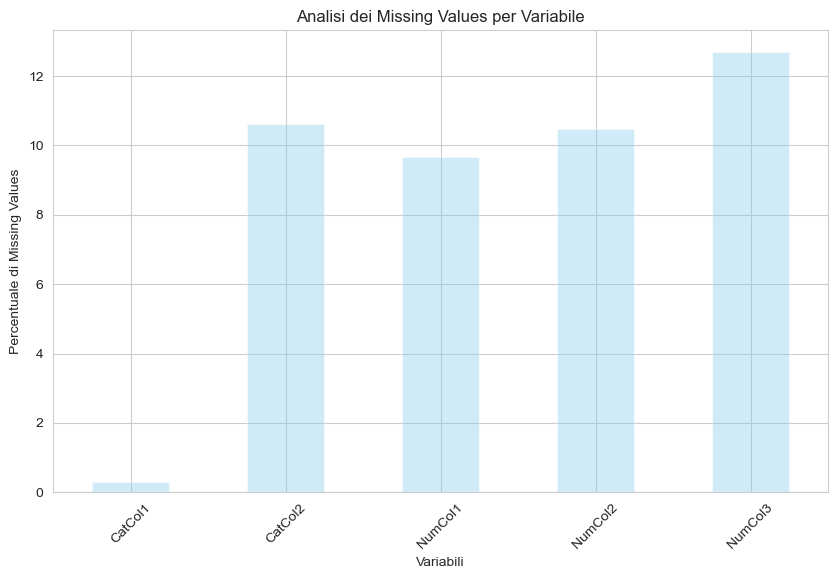

In [237]:
#crea il gafico a barre
plt.figure(figsize=(10,6))
missing_percent.plot(kind='bar', color='skyblue', alpha=0.4)
plt.xlabel('Variabili')
plt.ylabel('Percentuale di Missing Values')
plt.title('Analisi dei Missing Values per Variabile')
plt.xticks(rotation=45)
plt.show()

## Variabili : Feature1, Feature2, Feature3

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Genera dati di esempio
data = {
    'Feature1': [1, 2, np.nan, 4, 5],
    'Feature2': [np.nan, 2, 3, 4, np.nan],
    'Feature3': [1, np.nan, 3, 4, 5]
}
# Crea un DataFrame
df = pd.DataFrame(data)
df

,Feature1,Feature2,Feature3
0,1.0,NaN,1.0
1,2.0,2.0,NaN
2,NaN,3.0,3.0
3,4.0,4.0,4.0
4,5.0,NaN,5.0


In [213]:
df.isnull()

,Feature1,Feature2,Feature3
0,False,True,False
1,False,False,True
2,True,False,False
3,False,False,False
4,False,True,False


In [214]:
df.isnull().sum()

Feature1    1
Feature2    2
Feature3    1
dtype: int64

In [215]:
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent

Feature1    20.0
Feature2    40.0
Feature3    20.0
dtype: float64

In [216]:
#informazioni sul dataset 
print(df.info())

#statistiche desrittive
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  4 non-null      float64
 1   Feature2  3 non-null      float64
 2   Feature3  4 non-null      float64
dtypes: float64(3)
memory usage: 252.0 bytes
None
       Feature1  Feature2  Feature3
count  4.000000       3.0  4.000000
mean   3.000000       3.0  3.250000
std    1.825742       1.0  1.707825
min    1.000000       2.0  1.000000
25%    1.750000       2.5  2.500000
50%    3.000000       3.0  3.500000
75%    4.250000       3.5  4.250000
max    5.000000       4.0  5.000000


In [244]:
#gesione valori mancanti
missing_data = df.isnull().sum()
print('valori mancanti per ciascuna colonna: ')
print(missing_data)

valori mancanti per ciascuna colonna: 
Età          0
Genere       0
Punteggio    0
Reddito      0
dtype: int64


## Matrici Features

In [246]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Genera dati di esempio
data = {
    'Feature1': [1, 2, np.nan, 4, 5],
    'Feature2': [np.nan, 2, 3, 4, np.nan],
    'Feature3': [1, np.nan, 3, 4, 5]
}

# Crea un DataFrame
df = pd.DataFrame(data)

# Calcola la matrice di missing values
missing_matrix = df.isnull()
missing_matrix

,Feature1,Feature2,Feature3
0,False,True,False
1,False,False,True
2,True,False,False
3,False,False,False
4,False,True,False


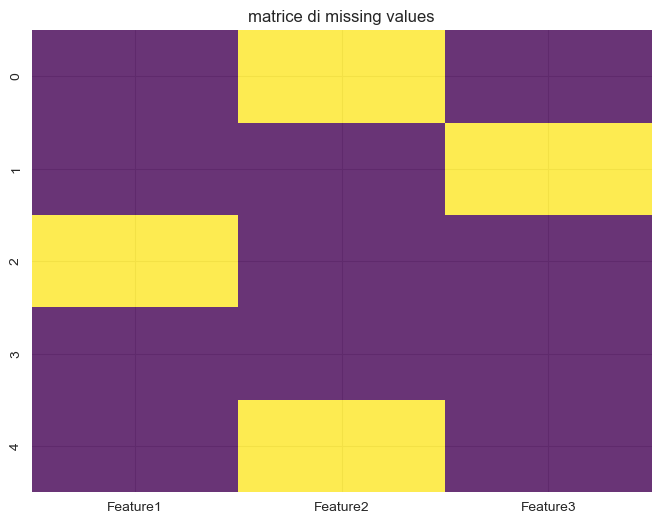

In [208]:
#crea heatmap colorata
plt.figure(figsize=(8,6))
sns.heatmap(missing_matrix, cmap='viridis', cbar=False,alpha=0.8)
plt.title('matrice di missing values')
plt.show()

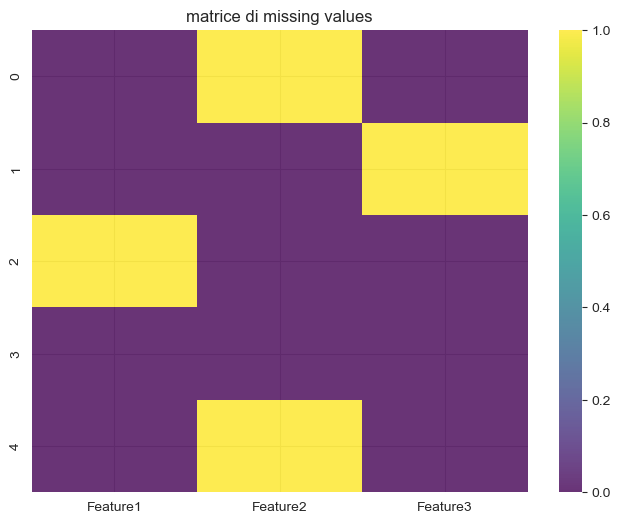

In [209]:
plt.figure(figsize=(8,6))
sns.heatmap(missing_matrix, cmap='viridis', cbar=True,alpha=0.8)
plt.title('matrice di missing values')
plt.show()

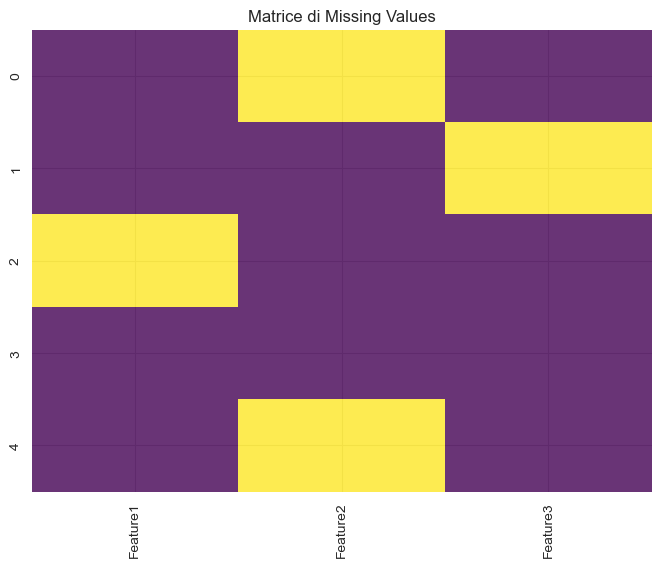

In [247]:
missing_matrix = df.isnull()

#crea una heatmap colorata
plt.figure(figsize=(8,6))
sns.heatmap(missing_matrix, cmap='viridis', cbar=False, alpha=0.8)
plt.title('Matrice di Missing Values')
plt.xticks(rotation=90) #nomi ordinata X, quanti gradi

plt.show()

## Matrice Cat e Var

C:\Users\Utente\AppData\Local\Temp\ipykernel_7540\1612240019.py:14: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



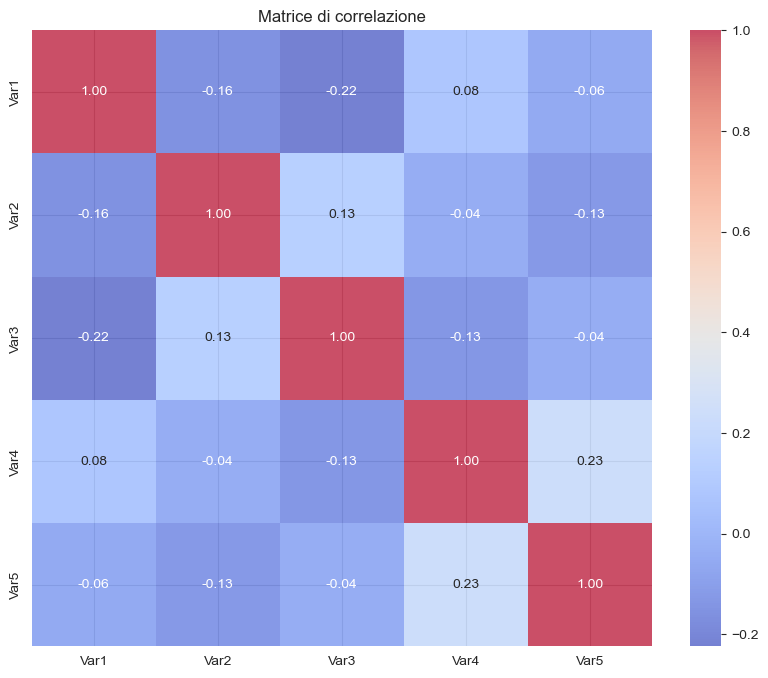

In [190]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Genera un dataset di esempio con variabili numeriche
np.random.seed(42)
data = pd.DataFrame(np.random.rand(100, 5), columns=['Var1', 'Var2', 'Var3', 'Var4', 'Var5'])

# Aggiungi alcune variabili categoriche generate casualmente
data['Categoria1'] = np.random.choice(['A', 'B', 'C'], size=100)
data['Categoria2'] = np.random.choice(['X', 'Y'], size=100)

#calcola la matrice di correlazione tra tutte le variabili numerici (correlazione = )
correlation_matrix = data.corr()

#visualizza la matrice di correlazione come heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", alpha=0.7)

plt.title('Matrice di correlazione')
plt.show()